# CS 436 CS5310 - Computer Vision - Assignment 4

*__Submission Instructions:__*
- Rename this notebook to `PA4_rollnumber.ipynb` before submission on LMS.
- Code for all the tasks must be written in this notebook (you do not need to submit any other files).
- The output of all cells must be present in the version of the notebook you submit.
- The university honor code should be maintained. Any violation, if found, will result in disciplinary action. 

Following are the links that have been used for references to this assignment.

https://stackoverflow.com/questions/47555829/preprocess-input-method-in-keras

https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

https://machinelearningmastery.com/save-load-keras-deep-learning-models/

https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c


In [0]:
#Import all the required libraries

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from keras.models import load_model
from keras.applications import vgg16

In [0]:
import pandas as pd
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import decode_predictions, preprocess_input

In [0]:
import os
import sklearn.metrics

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
!ls "/content/gdrive/My Drive/Colab Notebooks"
!unzip -qq "/content/gdrive/My Drive/Colab Notebooks/test-multiple_fruits.zip"
!unzip -qq "/content/gdrive/My Drive/Colab Notebooks/fruits-trainValidate.zip"

'Computer Vision Fruit Classification Dataset'	 PA4_DeepLearning.ipynb
 fruits-trainValidate.zip			 test-multiple_fruits.zip
replace test-multiple_fruits/apple.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace fruits-360/readme.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
image_size = 224;


TypeError: ignored

## Overview

In this assignment you will be exploring a few important concepts used in the deep learning projects:
- Training image classification algorithms using Deep Learning
- Dataset Analyses 
- Testing deep learning classifier with the test data
- Fine-tuning / Transfer Learning

We will be using a customized datasets, the links to download the data are provided to you. You will also be working with pretrained models, which could be downloaded from keras applications. You are **highly** encouraged to explore the images in dataset and model architectures in order to get the most out of this assignment. 

**_Dataset:_**
- D1- Test Data for evaluating the pretrained model (VGG-16) can be found in the folder "test-multiple_fruits" [here](https://drive.google.com/drive/folders/1ViePNUqS3LmPkaW6vJ1cRb4YGyIkWpqz?usp=sharing)
- D2- Data to be used for fine-tuning VGG-16 for 75 classes of fruits could be downloaded from the same link in the folder "fruits-trainValidate"


**_Pretrained Models:_** 
Can be found [here](https://keras.io/applications/#applications)


## Task 1: Data Preparation

Evaluate the performance of a pretrained network (VGG-16) for the test-multiple_fruits data downloaded by predicting labels of each image. You will:
- Download the VGG16 model and compile it with pretrained weights from imagenet.
- Obtain predictions for the test-multiple_fruits D1 dataset
- Print the predictions for all the test image from D1

In [0]:
model = vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
def pretrained_test(model, img, fruit_name):
  img = img_to_array(img)
  img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
  img = vgg16.preprocess_input(img)
  prediction = model.predict(img)
  pred_name = vgg16.decode_predictions(prediction)
  top_pred = pred_name[0][0]
  print('Original fruit: ', fruit_name[:len(fruit_name)-4], '   Predicted Fruit: %s (%.2f%%)' % (top_pred[1], top_pred[2]*100))
   
# Hints
#vgg16_pretrained = load_model(...)
#vgg16_pretrained.summary()
#vgg16_pretrained.compile(...)

#vgg16.predict(...)

In [66]:
dataset1_path = 'test-multiple_fruits/'
image_size = (224, 224)
for fruit_name in os.listdir(dataset1_path):
    image = load_img(dataset1_path+fruit_name, target_size= image_size)
    pretrained_test(model, image, fruit_name)

Original fruit:  kachi    Predicted Fruit: lemon (28.92%)
Original fruit:  cherry_strawberries    Predicted Fruit: guacamole (62.88%)
Original fruit:  raspberry5    Predicted Fruit: strawberry (74.01%)
Original fruit:  pomegranate    Predicted Fruit: pomegranate (65.32%)
Original fruit:  dates    Predicted Fruit: abacus (38.20%)
Original fruit:  grape_pear_mandarine2    Predicted Fruit: fig (82.88%)
Original fruit:  physalis    Predicted Fruit: rotisserie (62.49%)
Original fruit:  huckleberry    Predicted Fruit: honeycomb (53.67%)
Original fruit:  raspberry_apple    Predicted Fruit: buckeye (61.51%)
Original fruit:  strawberries4    Predicted Fruit: strawberry (93.30%)
Original fruit:  apple_apricot_peach_peach(flat)_pomegranate_pear_plum    Predicted Fruit: tray (28.33%)
Original fruit:  tangelo    Predicted Fruit: orange (87.63%)
Original fruit:  strawberries    Predicted Fruit: pot (29.19%)
Original fruit:  cherry_strawberries2    Predicted Fruit: cucumber (15.12%)
Original fruit:  

## Batch Generator for Task 2
You could either use this batch image generator or could write your own batch generator if required for fine-tunning

In [71]:
# Image Augmentation
#Replace the input training/validation directories with the path to your training and validation splits
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory('fruits-360/Training/', target_size = (75, 75), batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory('fruits-360/Validation/', target_size = (75,75), batch_size = 200, class_mode = 'categorical')

Found 37836 images belonging to 75 classes.
Found 12709 images belonging to 75 classes.


## Task 2: Transfer Learning

Next you will employ Transfer Learning and finetune the pretrained vgg-16 model you used in Task1 to better fit the fine-tune dataset D2 for 75 classes of fruits (details available in the readme file of dataset folder). You will:

- Change the number of nodes in the last FC layer according to the number of classes i.e. 5 
- Freeze everything except the FC layers and train it using the train split of D2 (using appropriate hyperparameters), validating the network for validation split of data.
- Train (Finetune) the dataset with training split and validate it using validation split
- Plot loss/accuracy vs epochs curves for your simulation

*You can use scikit-learn's `metrics.confusion_matrix` function. Consult the relevant documentation.* 


In [73]:
tensor_shape = layers.Input(shape=(75,75,3))


#def finetune_test(...):
#    pass

# Hints
vgg_imagenet = vgg16.VGG16(include_top=False, weights='imagenet', input_tensor= tensor_shape)
for lyr in vgg_imagenet.layers:
    lyr.trainable = False
    #lyr.freeze = True

# add new FC layers here
alter_model = models.Sequential()
alter_model.add(vgg_imagenet)

alter_model.add(layers.Flatten())
alter_model.add(layers.Dense(75, activation='relu'))
alter_model.add(layers.Dropout(0.2))
alter_model.add(layers.Dense(75, activation='softmax'))

# print summary and compile
print(alter_model.summary())
alter_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 75)                345675    
_________________________________________________________________
dropout_8 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 75)                5700      
Total params: 15,066,063
Trainable params: 351,375
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [74]:
#Loss accuracy curves using matplot lib
history = alter_model.fit_generator(
        training_generator,
        steps_per_epoch=75,
        epochs=10,
        verbose=1,
        validation_data=validation_generator,
        validation_steps=75)

alter_model.save('alter_model.h5')  

Epoch 1/10
100/100 [==============================] - 86s 862ms/step - loss: 3.8853 - acc: 0.1261 - val_loss: 3.4354 - val_acc: 0.2688
Epoch 2/10
100/100 [==============================] - 75s 753ms/step - loss: 3.1220 - acc: 0.3229 - val_loss: 2.7202 - val_acc: 0.5270
Epoch 3/10
100/100 [==============================] - 75s 752ms/step - loss: 2.5410 - acc: 0.4599 - val_loss: 2.1688 - val_acc: 0.6485
Epoch 4/10
100/100 [==============================] - 75s 750ms/step - loss: 2.0951 - acc: 0.5495 - val_loss: 1.7357 - val_acc: 0.7420
Epoch 5/10
100/100 [==============================] - 76s 756ms/step - loss: 1.7545 - acc: 0.6146 - val_loss: 1.4291 - val_acc: 0.7651
Epoch 6/10
100/100 [==============================] - 76s 759ms/step - loss: 1.4739 - acc: 0.6668 - val_loss: 1.1917 - val_acc: 0.8079
Epoch 7/10
100/100 [==============================] - 75s 751ms/step - loss: 1.2832 - acc: 0.7036 - val_loss: 1.0241 - val_acc: 0.8428
Epoch 8/10
100/100 [==============================] - 7

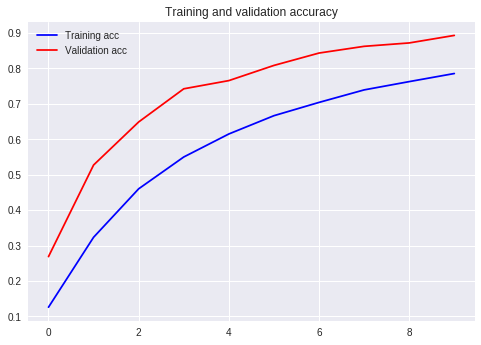

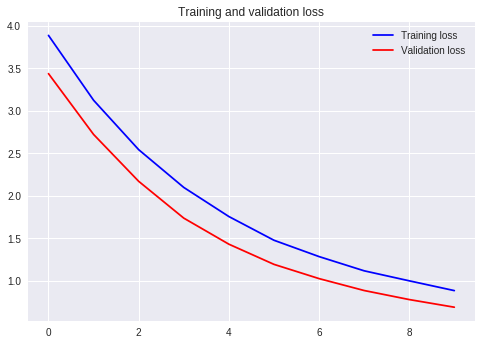

In [75]:
#copied from learnopencv link given above

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

## Task 3: Network Evaluation

Next you will test your finetuned model by plotting a confusion matrix between classes predicted. You will:

- Load the saved finetuned network
- Test your model for images in validation folder of D2
- Construct a multiclass confusion matrix (for any 10 classes) for actual and predicted class of each image and visualize the confmatrix as a heatmap

*You can use scikit-learn's `metrics.confusion_matrix` function. Consult the relevant documentation.* 

In [76]:
loaded_model = load_model('alter_model.h5')

valid_generator = validation_datagen.flow_from_directory('fruits-360/Validation/', target_size = (75, 75), batch_size = 200, class_mode = 'categorical')
 

Found 12709 images belonging to 75 classes.


In [77]:
predictions =loaded_model.predict_generator(valid_generator, steps=valid_generator.samples/valid_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

64/63 [==============================] - 16s 247ms/step


In [83]:
#couldn't get how to get actual labels from validation data :(
#otherwise rest of confusion matrix is simple ^_^

confusion_matrix = sklearn.metrics.confusion_matrix(labels, predicted_classes)
print(confusion_matrix[0:10, 0:10])


NameError: ignored

In [0]:
dataframe = pd.DataFrame(confusion_matrix[0:10, 0:10], range(10), range(10))
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.2) 
sns.heatmap(dataframe, annot=True,annot_kws={"size": 12})

## Task 4: Prediction

Next you will test your finetuned model for test-multiple_fruits images and compare the result with the results of Task 1. You will:

- Predict labels for images in test-multiple_fruits D1 folder using finetuned network
- Compare your result qualitativly and quatitatively (by visualizing some of the comparing images with their respective labels)
- Analyse and discuss the improvement of results (if found any)
